In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv('creditcard.csv')
df.columns = df.columns.str.lower()

In [3]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [6]:
df.isnull().sum().sum()

0

In [7]:
df['class'].value_counts()

class
0    284315
1       492
Name: count, dtype: int64

In [8]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [9]:
fraud = df[df['class']==1]
normal = df[df['class']==0]
print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Normal Transactions: {normal.shape}')

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


In [10]:
pd.concat([fraud['amount'].describe(), normal['amount'].describe()], axis=1)

,amount,amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


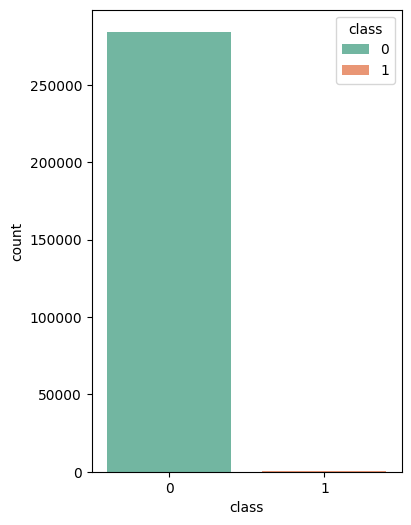

In [11]:
fig, ax = plt.subplots(figsize=(4,6))

sns.countplot(x='class', data=df, hue='class', palette='Set2', ax=ax, legend=True)
plt.show()

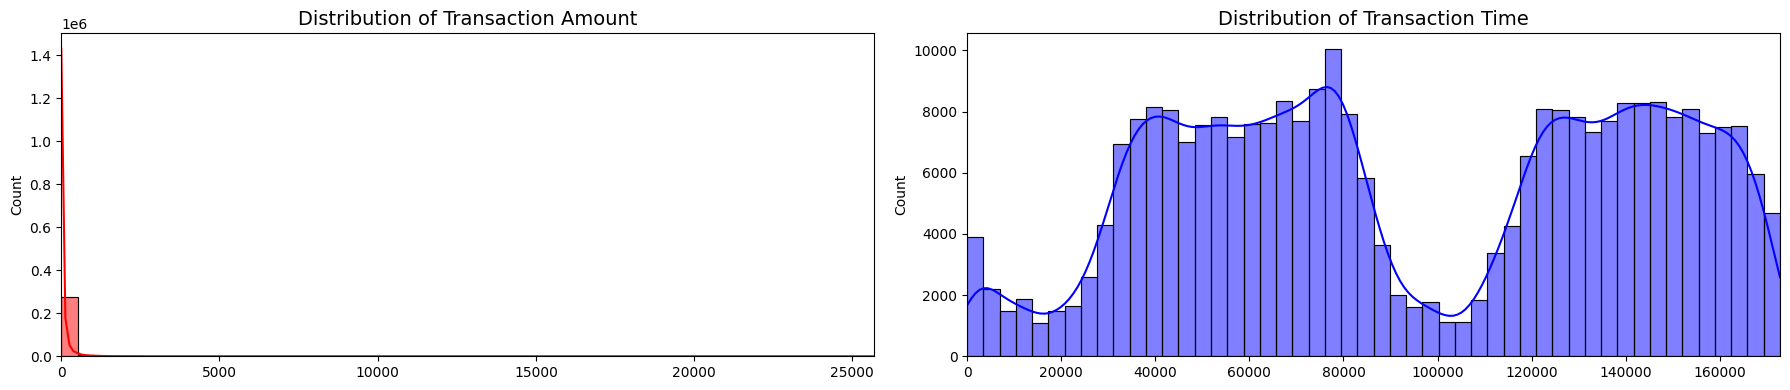

In [12]:
amount_val = df['amount'].values
time_val = df['time'].values

# Set up the subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Plot the histogram for transaction amount with KDE
sns.histplot(amount_val, ax=ax[0], color='r', kde=True, bins=50)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plot the histogram for transaction time with KDE
sns.histplot(time_val, ax=ax[1], color='b', kde=True, bins=50)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# Display the plot
plt.tight_layout()
plt.show()

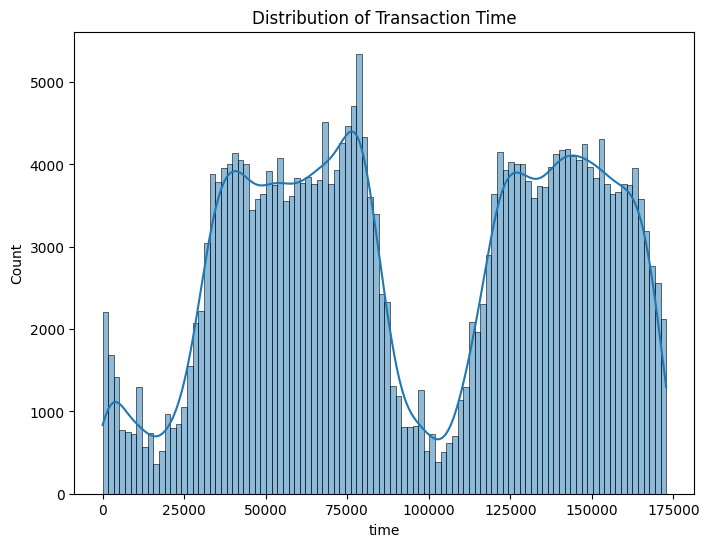

In [13]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time')
sns.histplot(df['time'], bins=100, kde=True)
plt.show()

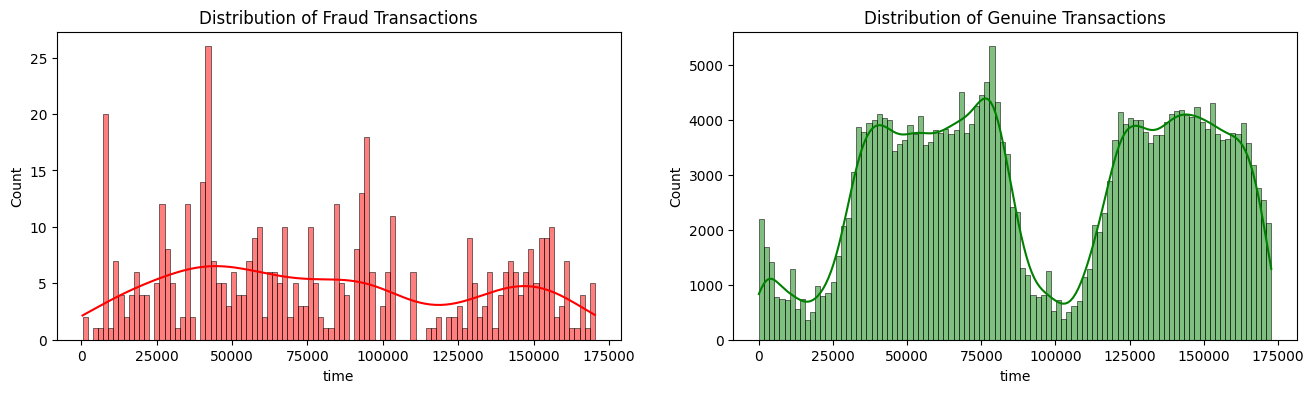

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.histplot(fraud['time'], bins=100, color='red', kde=True, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(normal['time'], bins=100, color='green', kde=True, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

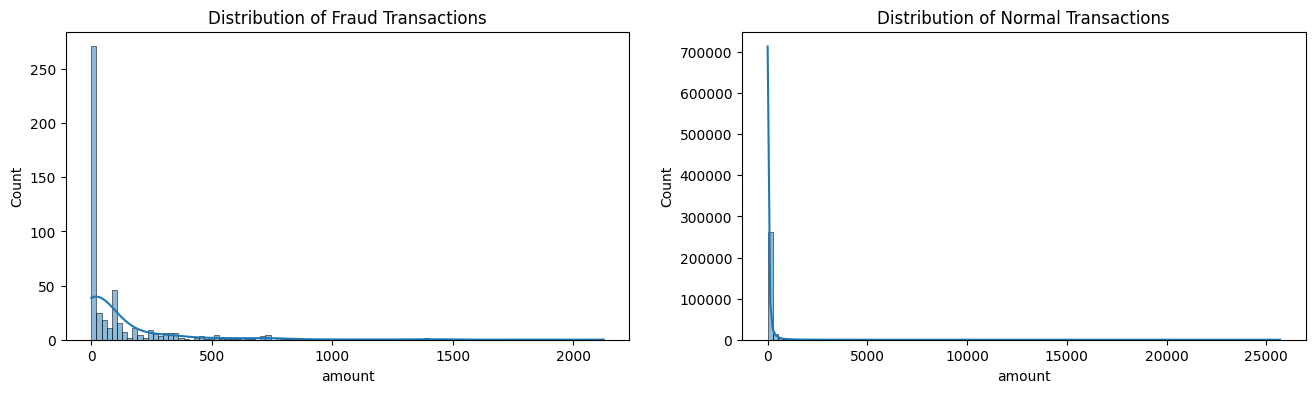

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.histplot(fraud['amount'], bins=100, kde=True, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(normal['amount'], bins=100, kde=True, ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

plt.show()

In [16]:
# corr_matrix = df.corr()
# plt.figure(figsize=(18, 16))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
# plt.title("Correlation Heatmap")
# plt.show()

In [17]:
X = df.drop(['class','time'], axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((227845, 29), (56962, 29))

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print('Original dataset shape:', y_train.shape)
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape:', y_train_smt.shape)

Original dataset shape: (227845,)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
invalid literal for int() with base 10: ''
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))
                         ^^^^^^^^^^^^^^^^^^^^^^^


Resampled dataset shape: (454908,)


In [21]:
# from sklearn.preprocessing import StandardScaler

# df_scaled = df.copy()
# scaler = StandardScaler()
# df[['amount', 'time']] = StandardScaler().fit_transform(df[['amount', 'time']])
# df_scaled[['amount', 'time']].describe()

In [22]:
# features = df.drop(columns=['class'])
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(features)
# pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
# pca_df['class'] = df['class']

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue='class', palette={0: 'green', 1: 'red'}, alpha=0.5)

# plt.title('PCA of Credit Card Transactions')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Class', labels=['Normal', 'Fraud'])
# plt.show()

In [23]:
# X = df.drop(columns=['class'])
# y = df['class']

# # Apply SMOTE to create synthetic samples
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Combine the resampled features and target into a new DataFrame
# df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
# df_balanced['class'] = y_resampled

# # Check the class distribution
# print(df_balanced['class'].value_counts())

In [24]:
# X_balanced = df_balanced.drop(columns=['class'])
# y_balanced = df_balanced['class']
# scaler = StandardScaler()  # You can also use MinMaxScaler()
# X_balanced_scaled = scaler.fit_transform(X_balanced)

# # Combine the scaled features and target into a new DataFrame
# df_balanced_scaled = pd.DataFrame(X_balanced_scaled, columns=X_balanced.columns)
# df_balanced_scaled['class'] = y_balanced.values

In [25]:
# df_balanced_scaled.head()

In [26]:
# df_balanced_scaled['class'].value_counts()

In [27]:
# X = df_balanced_scaled.drop(columns=['class'])
# y = df_balanced_scaled['class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans_labels = kmeans.fit_predict(pca_df[['PCA1', 'PCA2']])
# pca_df['kmeans_cluster'] = kmeans_labels

In [29]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue='kmeans_cluster', palette={'blue', 'green'}, alpha=0.5)

# plt.title('K-Means Clustering on PCA of Credit Card Transactions')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1'])
# plt.show()

In [30]:
# pca_df['class'] = df['class'].values 
# kmeans_labels_mapped = np.where(pca_df['kmeans_cluster'] == pca_df['class'].mode()[0], 0, 1)

# # Classification Report and Confusion Matrix
# print("Classification Report for K-Means (mapped to true labels):")
# print(classification_report(pca_df['class'], kmeans_labels_mapped))

# print("Confusion Matrix for K-Means (mapped to true labels):")
# print(confusion_matrix(pca_df['class'], kmeans_labels_mapped))

In [31]:
# iso_forest = IsolationForest(contamination=0.01, random_state=42)
# iso_forest_labels = iso_forest.fit_predict(pca_df[['PCA1', 'PCA2']])

# pca_df['iso_forest_label'] = [1 if label == -1 else 0 for label in iso_forest_labels]

In [32]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue='iso_forest_label', palette={0: 'blue', 1: 'green'}, alpha=0.5)

# plt.title('Isolation Forest Anomaly Detection on PCA of Credit Card Transactions')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
# plt.show()